<div align="center"> <h3><font color='blue'>CSE 4/574 Introduction to Machine Learning, Summer 2025 </font>
<h1> Assignment 2 - Part 1 : Data Analysis

<h3>Jayant Som (jsom@buffalo.edu) </div>

<h3>_______________________________________________________________________________________________________________________________ </div>

## <div align="center"> <h1><font color='maroon'> NETFLIX Dataset </font></div>

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import squarify
from wordcloud import WordCloud

## 2. Data Loading

In [2]:
df_netflix = pd.read_csv('./datasets/netflix_titles.csv')

## 3. Dataset Details and Statistics

In [3]:
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df_netflix.shape

(8807, 12)

In [6]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df_netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [9]:
df_netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 4. Missing-Value Investigation

In [11]:
df_netflix[df_netflix['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
# Here, the values of rating seems incorrect, they should be in duration column

In [13]:
df_netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
df_netflix[df_netflix['rating'].str.contains('min', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
# Fixed rows where 'rating' is a duration (e.g. '74 min')
duration_cover = df_netflix['rating'].str.contains('min', na=False)
df_netflix.loc[duration_cover, 'duration'] = df_netflix.loc[duration_cover, 'rating']
df_netflix.loc[duration_cover, 'rating'] = np.nan

In [16]:
df_netflix[df_netflix['rating'].str.contains('min', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [17]:
# NR = Not Rated means no ratings available
# UR = Unrated (mostly used for uncensored)

In [18]:
# Replacing blank ratings by NR which means 'Not Rated'
df_netflix['rating'] = df_netflix['rating'].fillna('NR')

In [19]:
df_netflix.isnull().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

## 5. Handling Categorical Data

In [20]:
string_columns = df_netflix.select_dtypes(include =['object']).columns

df_netflix[string_columns] = df_netflix[string_columns].astype('category')

df_netflix.dtypes

show_id         category
type            category
title           category
director        category
cast            category
country         category
date_added      category
release_year       int64
rating          category
duration        category
listed_in       category
description     category
dtype: object

 ## 6. Data Visualizations

### a. Content Type Distribution

In [21]:
df_netflix['type'].unique()

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [22]:
types = df_netflix['type'].value_counts()

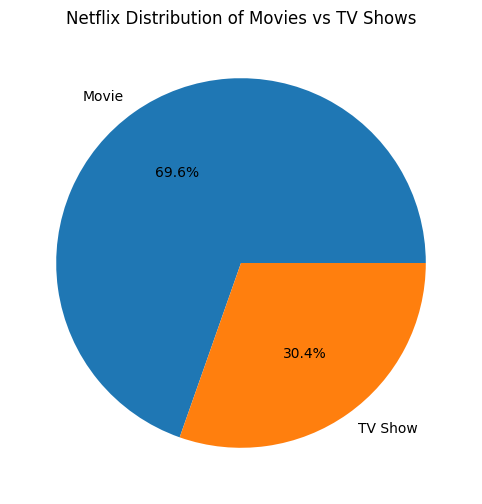

In [23]:
plt.figure(figsize=(10, 6))

plt.pie(types, labels = types.index, autopct = '%.1f%%')
plt.title('Netflix Distribution of Movies vs TV Shows')

plt.show()

**Observations** : The distribution of content types in the dataset reveals that movies constitute 69.6% of the total entries, while TV shows account for the remaining 30.4%. This indicates a significant predominance of movies over TV shows in the Netflix catalog represented by this dataset.

### b. Release Year Trend

In [24]:
df_netflix['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [25]:
year_count = df_netflix['release_year'].value_counts().sort_index()

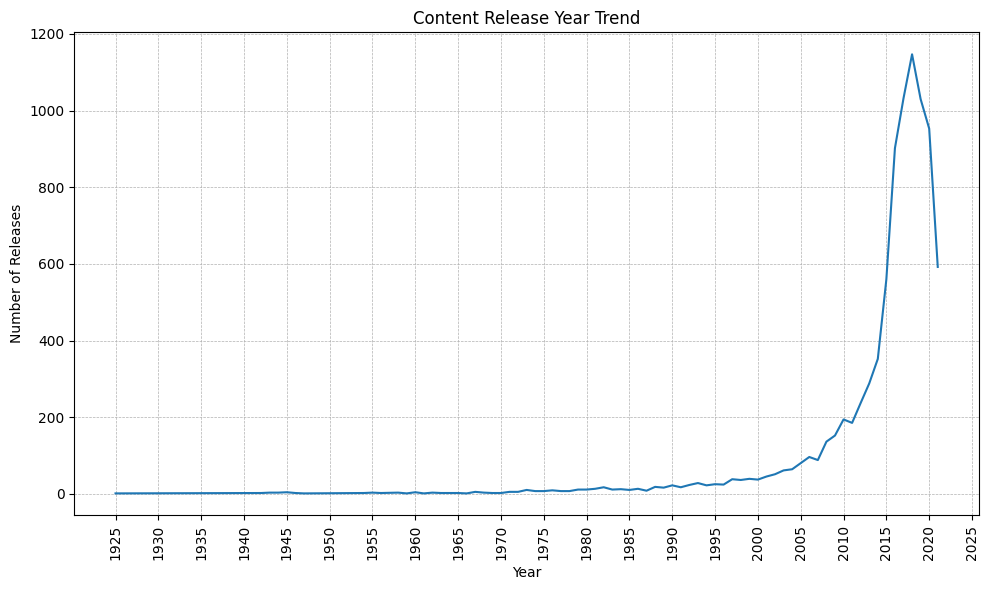

In [26]:
plt.figure(figsize = (10, 6))

year_count.plot()

plt.title('Content Release Year Trend')
plt.xlabel('Year')
plt.ylabel('Number of Releases')

plt.grid(True, which ='both', linestyle = '--', linewidth =0.5)
start_yr = year_count.index.min()
end_yr = year_count.index.max()
plt.xticks(range(start_yr, end_yr+5, 5), rotation= 90)
plt.tight_layout()

plt.show()

**Observations** :

- Pre-1990s: Minimal content releases, likely due to limited digital media adoption and archival constraints.

- 1990-2005: Gradual increase in releases, coinciding with early digital media expansion and improved content production.

- 2005 Onwards: Sharp upward trend, correlating with widespread internet adoption and the rise of streaming platforms.

- Peak (2018-2019): Highest release volumes observed just prior to the COVID-19 pandemic, reflecting industry growth.

- COVID-19 Impact (2019-2020): Significant decline in new releases due to production delays and disruptions.

- Post-2020: Continued downward trend, possibly indicating long-term pandemic effects or market saturation.

### c. Content Rating Distribution by Type

In [27]:
print(sorted(df_netflix['rating'].unique()))

['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']


In [28]:
# Created a cross tabulation of ratings by content type
rating_combo = pd.crosstab(df_netflix['rating'], df_netflix['type'])

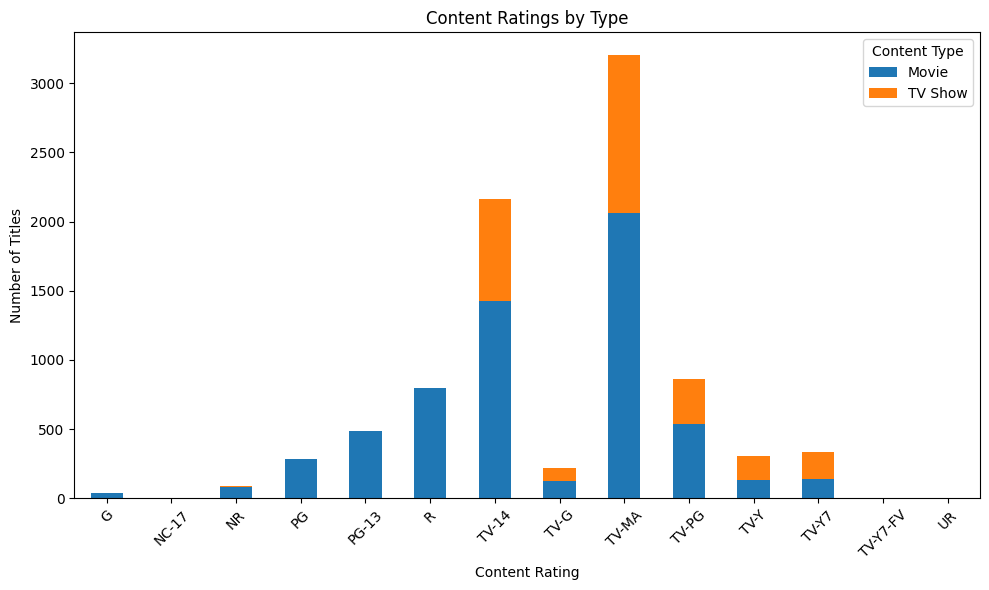

In [29]:
# Creating a stacked bar plot
rating_combo.plot(kind = 'bar', stacked = True, figsize=(10, 6))

plt.title('Content Ratings by Type')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')

plt.legend(title='Content Type')
plt.xticks(rotation=45)
# Adjusted the layout to prevent elements from overlapping
plt.tight_layout()

plt.show()

Ratings assigned by the MPAA (Motion Picture Association of America) for films and the TV Parental Guidelines Monitoring Board for television content:

- G - General Audiences
- NC-17 - No Children Under 17 Admitted
- NR - Not Rated
- PG  Parental Guidance Suggested
- PG-1-3 - Parents Strongly Cautioned (Under 13 Requires Parental Guidance)
- R - Restricted (Under 17 Requires Accompanying Parent or Adult Guardian)
- TV-14 - Parents Strongly Cautioned (Unsuitable for Children Under 14)
- TV-G - General Audience (Suitable for All Ages)
- TV-MA - Mature Audience Only (Designed for Adults)
- TV-PG - Parental Guidance Recommended
- TV-Y - Designed for Young Children (All Children)
- TV-Y7 - Directed to Older Children (Ages 7 and Above)
- TV-Y7-FV - Directed to Older Children (Fantasy Violence)
- UR - Unrated


**Observations** :

The dataset reveals that the most prevalent ratings across both movies and TV shows are:

- TV-MA (Mature Audience Only) - Indicating content intended for adults.

- TV-14 (Parents Strongly Cautioned - Unsuitable for Children Under 14) - Suggesting teen and young adult-oriented material.

This trend highlights that adult-oriented content dominates Netflix’s catalog, with a significant portion of titles targeting mature audiences rather than younger or family-friendly demographics.

### d. Most Frequent Cast

In [30]:
# In the cast column, there are many records having multiple actors, separated by commas. 
# To analyze individual actors, I am splitting names and exploding them into separate rows.

actor_list = (
    df_netflix['cast']
    .dropna()
    .str.split(', ')
    .explode()
    .str.strip()
)

top_actors = actor_list[actor_list != ''] .value_counts().head(20)

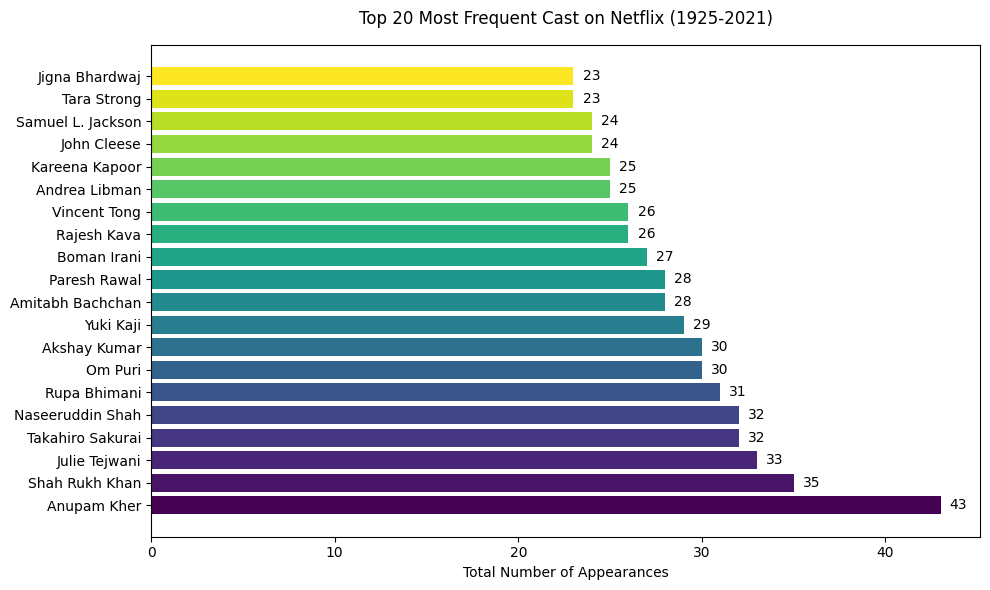

In [31]:
plt.figure(figsize=(10, 6))

# Creating the horizontal bar plot
bars = plt.barh(top_actors.index, top_actors.values, color = plt.cm.viridis(np.linspace(0, 1, len(top_actors))))

# Added count labels at end of each bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va= 'center')

plt.title('Top 20 Most Frequent Cast on Netflix (1925-2021)', pad = 15)
plt.xlabel('Total Number of Appearances')
plt.ylabel('')
plt.tight_layout()
plt.show()

### e. Top Countries

In [32]:
# In the country column, there are many records with multiple countries for any title, separated by commas. 
# This indicates that the title was produced/release in multiple countries. 
# To find which countries are top contributers, I am splitting country and exploding them into separate rows.

countries = (
    df_netflix['country']
    .dropna()
    .str.split(', ')  
    .explode()        
    .str.strip()  
)

top10_country = countries.value_counts().head(10)

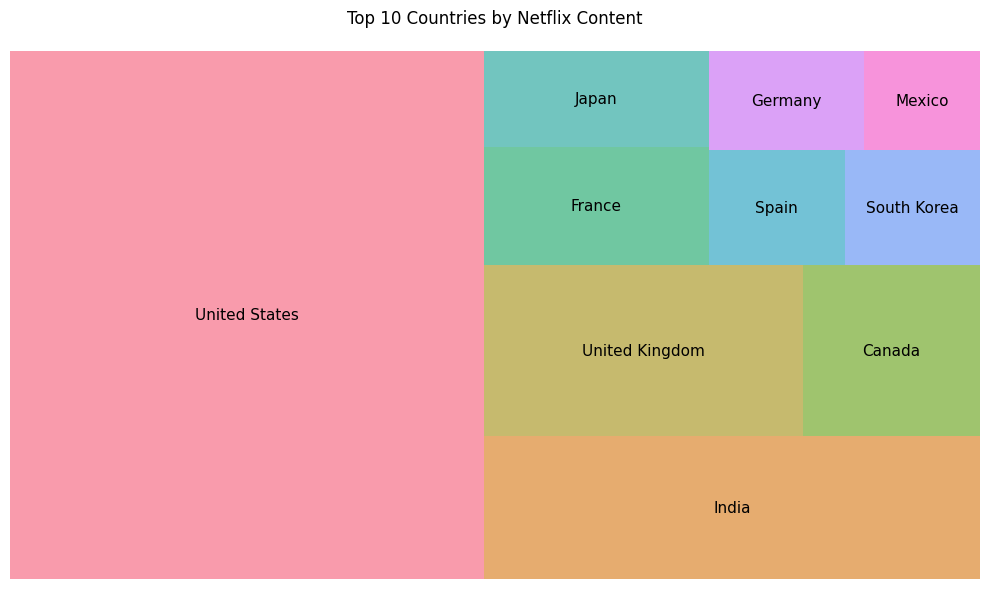

In [33]:
plt.figure(figsize=(10,6))
squarify.plot(sizes = top10_country.values, label=top10_country.index, color=sns.color_palette("husl", 10), alpha=0.7, text_kwargs={'fontsize':11})

plt.title('Top 10 Countries by Netflix Content', pad =20)
plt.axis('off')
plt.tight_layout()
plt.show()

### f. Most Common Genres

In [34]:
# In the listed_in column, there are many records with multiple genres for any title, separated by commas. 
# This indicates that the title is tagged to multiple genres. 
# To find which genres are most common, I am splitting and exploding them into separate rows.

genres = (
    df_netflix['listed_in']
    .dropna()
    .str.split(', ')        
    .explode() 
    .str.strip()           
)

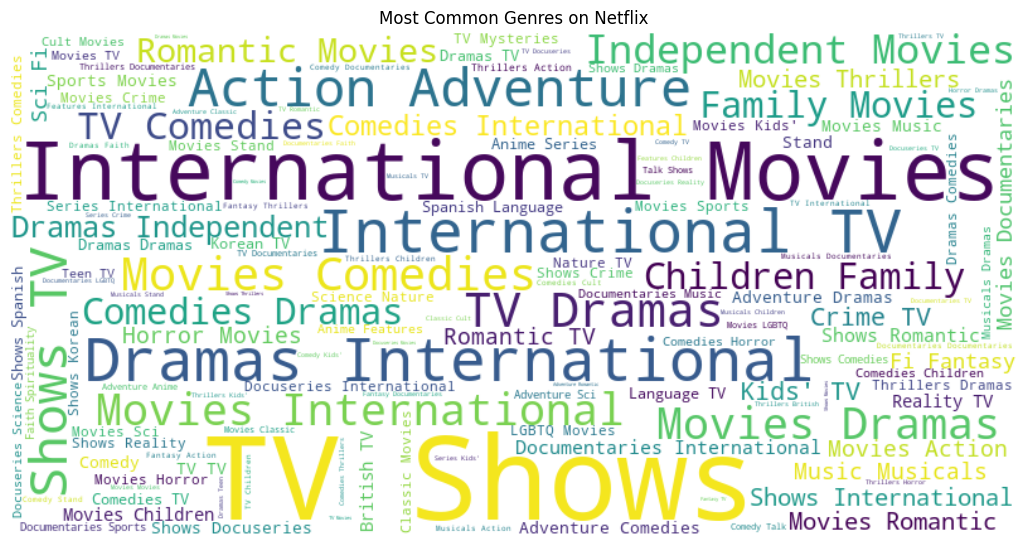

In [35]:
wordcloud = WordCloud(width= 800, height= 400, background_color= 'white').generate(' '.join(genres))

plt.figure(figsize = (13, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off') 
plt.title('Most Common Genres on Netflix')

plt.show()

### g. Analysis of Ratings by Country

In [36]:
# Taking out a subset of the dataset
df_rated = df_netflix[['country', 'rating']].copy()
df_rated = df_rated.dropna()

# To find individual countries, I am splitting and exploding them into separate rows.
df_rated['country'] = df_rated['country'].str.split(r',\s*')
df_rated = df_rated.explode('country')
df_rated['country'] = df_rated['country'].str.strip()

# Fetching top 10 countries
top_countries = df_rated['country'].value_counts().head(10).index
df_rated = df_rated[df_rated['country'].isin(top_countries)]

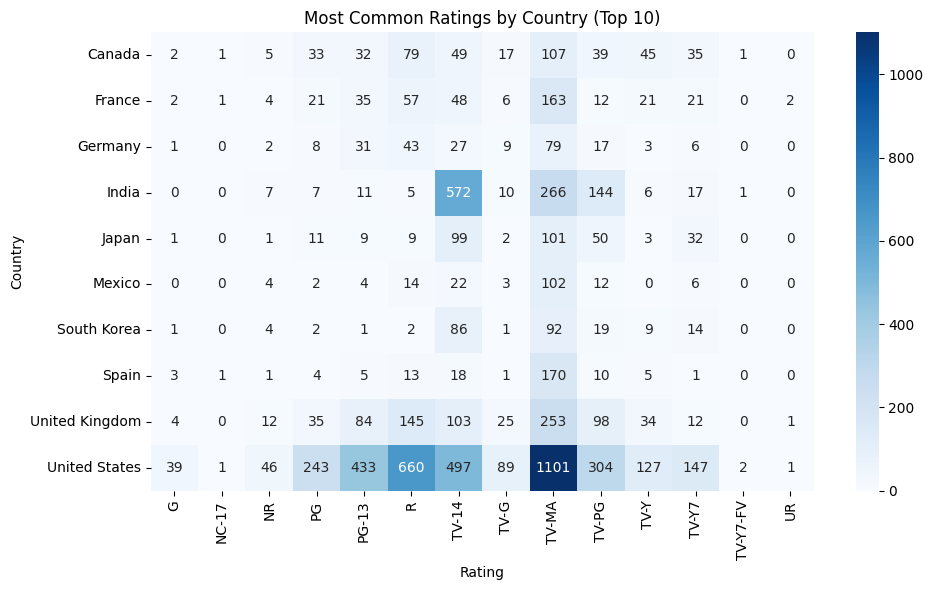

In [37]:
# Created frequency table (with observed=True to prevent warning)
heatmap_data = df_rated.groupby(['country', 'rating'], observed=True).size().unstack(fill_value=0)

plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap= 'Blues', annot= True, fmt= 'd')
plt.title('Most Common Ratings by Country (Top 10)')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Observations** :

Netflix’s library is adult-centric (TV-MA/R) in Western markets, while India and Japan show unique deviations - India with teen-focused (TV-14) and Japan with dual adult/kids (R/TV-Y) emphasis.

<h3>_______________________________________________________________________________________________________________________________ </div>

<div align="center"> <h1><font color='darkgreen'> INSURANCE Dataset </font></div>

## 2. Data Loading

In [38]:
df_insurance = pd.read_csv('./datasets/insurance.csv')

## 3. Dataset Details and Statistics

In [39]:
df_insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df_insurance.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [41]:
df_insurance.shape

(1338, 7)

In [42]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [44]:
df_insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [45]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
df_insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 4. Missing-Value Investigation

In [47]:
df_insurance.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values, so no further investigation and cleaning required.

## 5. Handling Categorical Data

In [48]:
string_columns = df_insurance.select_dtypes(include=['object']).columns

df_insurance[string_columns] = df_insurance[string_columns].astype('category')

df_insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

 ## 6. Data Visualizations

### a. Correlation Matrix of Numerical Features

In [49]:
correlation = df_insurance.corr(numeric_only = True)

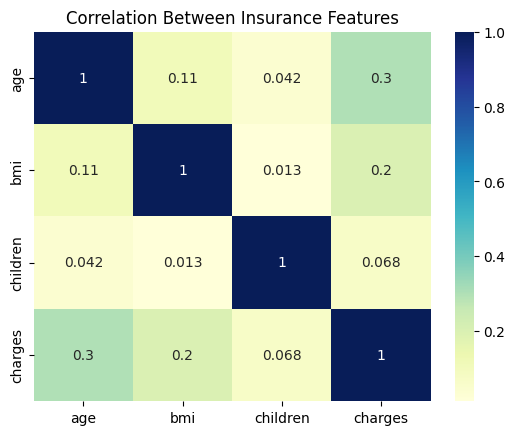

In [50]:
sns.heatmap(correlation, annot= True, cmap= 'YlGnBu')
plt.title('Correlation Between Insurance Features')
plt.show()

**Observations**:

- The strongest correlation is between age and charges (0.30)

- BMI has weaker but still notable correlation with charges (0.20)

- Number of children shows almost no linear relationship with charges

- No strong multicollinearity between predictors (all < 0.3)

### b. Numerical Features vs Target (Charges)

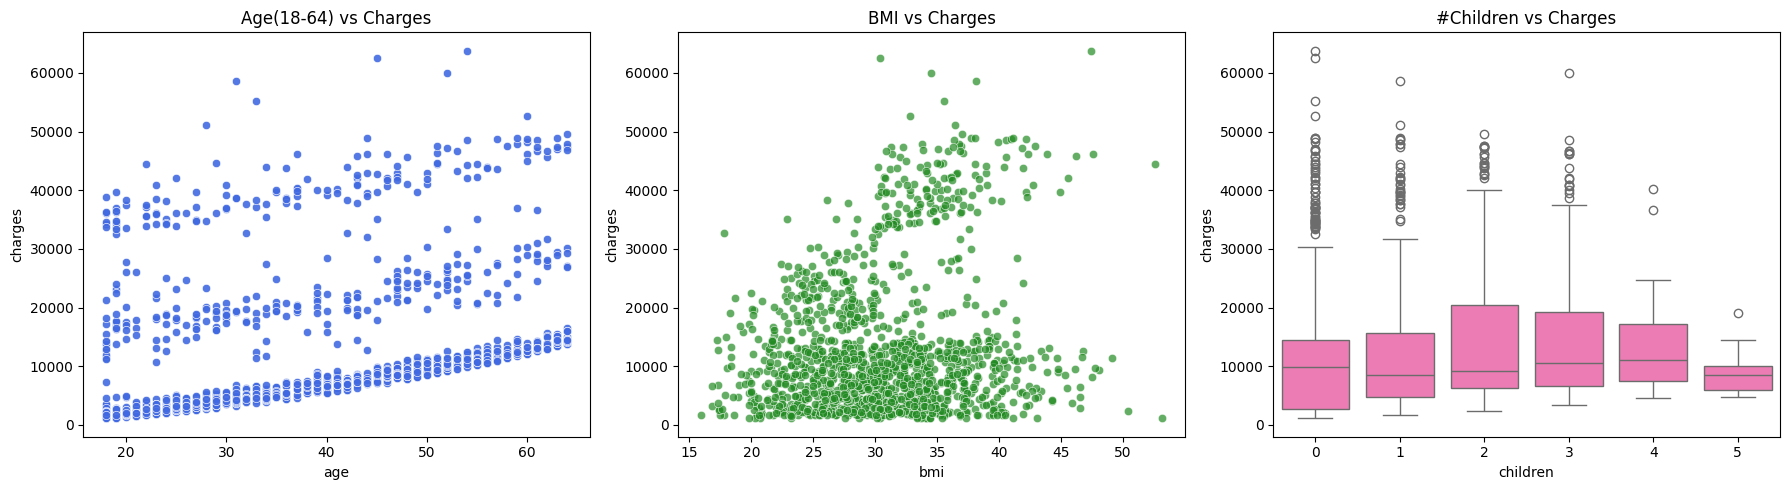

In [51]:
plt.figure(figsize=(18, 5))

# 1st plot : Age vs Charges
plt.subplot(1, 3, 1)
sns.scatterplot(data = df_insurance, x= 'age', y= 'charges', alpha=0.9, color = 'royalblue')
plt.title('Age(18-64) vs Charges')

# 2nd plot : BMI vs Charges
plt.subplot(1, 3, 2)
sns.scatterplot(data = df_insurance, x= 'bmi', y= 'charges', alpha=0.7, color = 'forestgreen')
plt.title('BMI vs Charges')

# 3rd plot : Children vs Charges (using boxplot)
plt.subplot(1, 3, 3)
sns.boxplot(data = df_insurance, x= 'children', y= 'charges', color= 'hotpink')
plt.title('#Children vs Charges')

plt.tight_layout()
plt.show()

### c. Categorical Features vs Target (Charges)

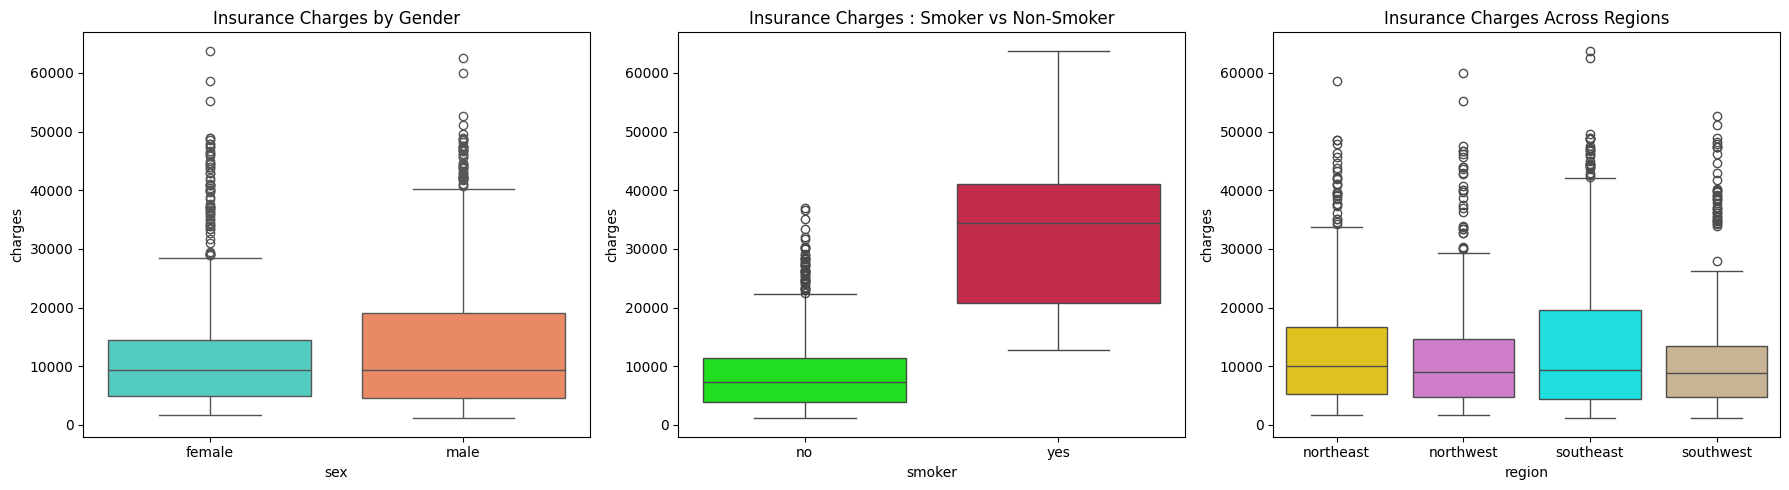

In [52]:
plt.figure(figsize=(18, 5))

# 1st plot : Sex vs Charges
plt.subplot(1, 3, 1)
sns.boxplot(data = df_insurance, x= 'sex', y= 'charges', hue= 'sex', palette=['turquoise','coral'], legend=False)
plt.title('Insurance Charges by Gender')

# 2nd plot : Smoker vs Charges
plt.subplot(1, 3, 2)
sns.boxplot(data = df_insurance, x= 'smoker', y= 'charges', hue= 'smoker', palette=['lime','crimson'], legend=False)
plt.title('Insurance Charges : Smoker vs Non-Smoker')

# 3rd plot : Region vs Charges
plt.subplot(1, 3, 3)
sns.boxplot(data = df_insurance, x= 'region', y= 'charges', hue= 'region', palette=['gold','orchid','aqua','tan'], legend=False)
plt.title('Insurance Charges Across Regions')

plt.tight_layout()
plt.show()

### d. Pairplot of numerical features

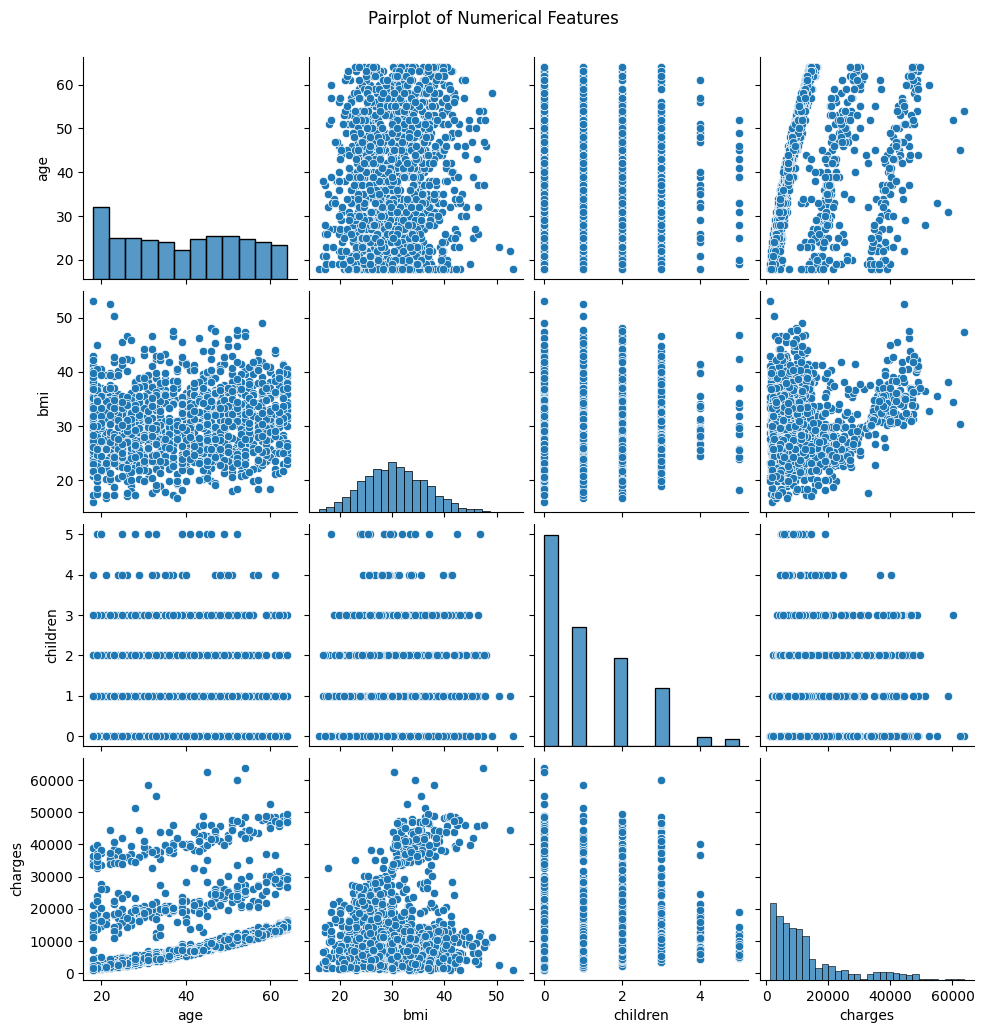

In [53]:
sns.pairplot(df_insurance[['age', 'bmi', 'children', 'charges']])
plt.suptitle('Pairplot of Numerical Features', y = 1.03)
plt.show()

### e. Age Distribution by Smoker Status

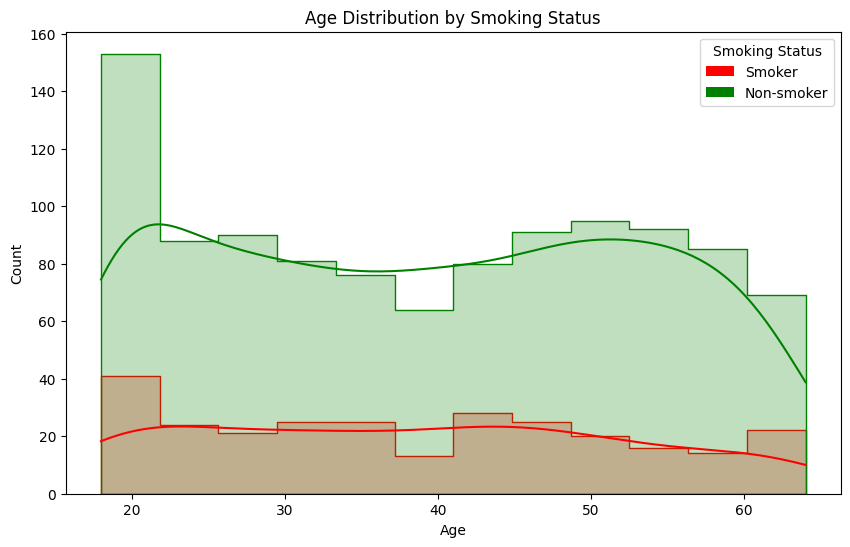

In [54]:
plt.figure(figsize=(10, 6))

sns.histplot(data = df_insurance, x = 'age', hue = 'smoker', palette={'yes': 'red', 'no': 'green'},element='step', kde= True)

legend_elements = [Patch(facecolor='red', label= 'Smoker'),Patch( facecolor='green', label='Non-smoker')]
plt.legend(handles=legend_elements, title='Smoking Status')

plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Observations:**

Smokers tend to be slightly younger than non-smokers on average. Most smokers are in their 20s-50s, while non-smokers are more evenly spread across all ages.

### f. BMI Distribution by Region

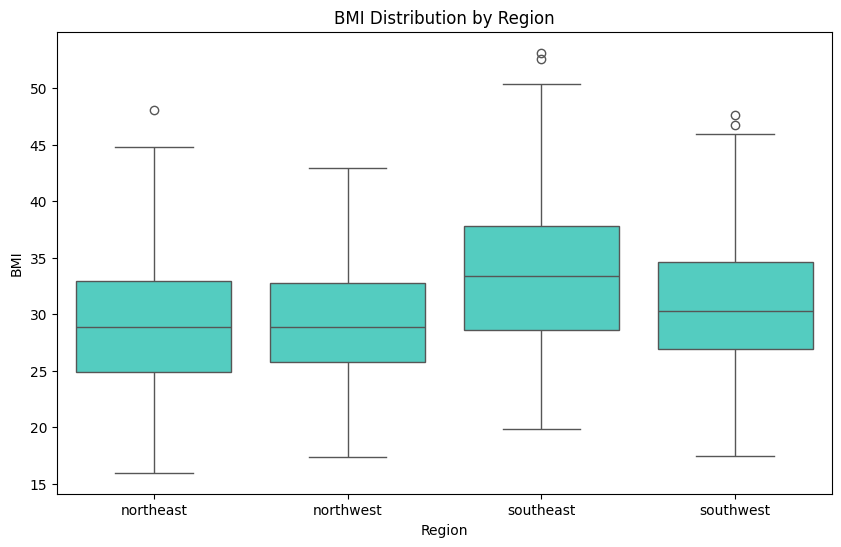

In [55]:
plt.figure(figsize=(10, 6))

sns.boxplot(data = df_insurance, x = 'region', y = 'bmi', color = 'turquoise')
plt.title('BMI Distribution by Region')
plt.xlabel('Region')
plt.ylabel('BMI')

plt.show()

**Observations :**

- The Southeast stands out as having the heaviest residents

- Southwest residents seem healthiest weight-wise

- Northern regions are pretty similar to each other

This helps explain why insurance costs vary by region : heavier people often have more health issues and require more insurance.

### g. Simple regression plot

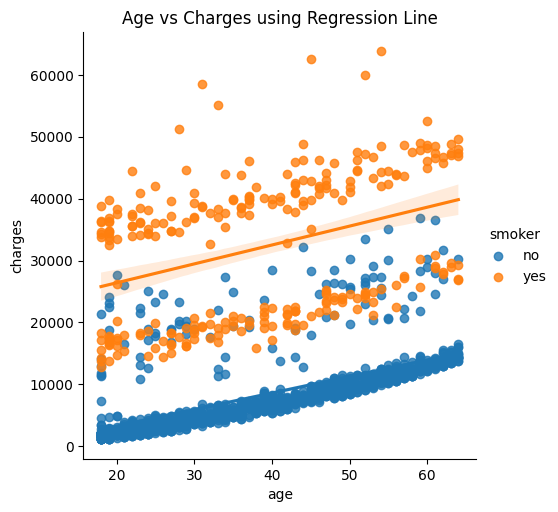

In [56]:
sns.lmplot(data = df_insurance, x = 'age', y = 'charges', hue='smoker')
plt.title('Age vs Charges using Regression Line')
plt.show()

## References Used

https://pandas.pydata.org/docs/user_guide/index.html

https://machinelearningknowledge.ai/matplotlib-heatmap-complete-tutorial-for-beginners/

https://seaborn.pydata.org/tutorial.html

https://seaborn.pydata.org/generated/seaborn.color_palette.html

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html

https://seaborn.pydata.org/tutorial/regression.html

https://python-graph-gallery.com/590-advanced-treemap/

https://www.datacamp.com/tutorial/wordcloud-python

https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system